In [1]:
#Import required libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#libraries for visualiziong Decision Trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
#Load Data
file_loc = 'C:\\Users\\TJ\\Documents\\Denver\\GitHub\\TheZoen\\Data\\trial_last\\all.xlsx'
df = pd.read_excel(file_loc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210143 entries, 0 to 210142
Data columns (total 7 columns):
temp        210143 non-null float64
wind        210143 non-null float64
rain        210143 non-null float64
humi        210143 non-null float64
dew         210143 non-null float64
snow        210143 non-null float64
accident    210143 non-null int64
dtypes: float64(6), int64(1)
memory usage: 11.2 MB


In [3]:
# df = df.iloc[:, [2,3,9,10,11,12,13,14]]

In [4]:
# #Feature Selection
# #Split dataset in feature and target variable
# feature_idx = df.columns[2:7]
# feature_idx #Index(['total.Humi', 'total.temp', 'total.wind', 'total.rain', 'total.dew'], dtype='object')

# features = list(feature_idx)
# features #['total.Humi', 'total.temp', 'total.wind', 'total.rain', 'total.dew']
# causes = list(df.Cause.unique())
# causes #['일반조난', '산악기타', '실족추락', '개인질환', '암벽등반', '탈진탈수', '저체온증', '낙석낙빙']

In [5]:
X = df.iloc[:,:5]
Y = df.accident
features = list(df.columns[:5])
print(features) #['temp', 'wind', 'rain', 'humi', 'dew']
# accident = list(df.accident.unique())
# print(accident) #[0, 1]
accident = ['0', '1']
# print(accident) #['0', '1']
X.head()

['temp', 'wind', 'rain', 'humi', 'dew']


temp  wind  rain  humi   dew
0 -5.35  1.50  0.00  70.0 -9.85
1 -5.75  1.35  0.00  71.5 -9.85
2 -2.95  1.50  0.00  69.5 -6.15
3 -0.25  2.30  0.25  70.5 -3.45
4  0.80  3.90  0.00  69.5 -2.25

In [6]:
#Splitting Data
#split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [7]:
#Build Decision Tree Model

#create decision Tree classifer object
clf = DecisionTreeClassifier()
#Train decision Tree classifer
clf = clf.fit(X_train, Y_train)
#predict the response for test dataset
Y_pred = clf.predict(X_test)

In [8]:
#Evaluate Model
#Model Accuracy, how often is the classifier correct?
print("Accuracy : ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy :  0.8372697999777929


In [9]:
# #Visualize Decision Trees
# dot_data = StringIO()
# export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True,
#                 feature_names = features, class_names = accident)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('decisionTree.png')
# Image(graph.create_png())

In [10]:
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [11]:
#분류기 이름 -> (선스타일, 분류기 인스턴스)
Class_Map = {'logistic':('-', LogisticRegression()),
            'Naive':('_', GaussianNB()),
            'DecisionTree':('--', DecisionTreeClassifier(max_depth = 5)),
            'RandomForest':(':', RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1))}

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

logistic
Score of K-fold Cross Validation : [0.9111349  0.91494171 0.91172972 0.90588935 0.907674  ] Mean: 0.91 

Naive
Score of K-fold Cross Validation : [0.9111349  0.91494171 0.91172972 0.90588935 0.907674  ] Mean: 0.91 

DecisionTree
Score of K-fold Cross Validation : [0.91101594 0.91482275 0.91161075 0.90517549 0.90731707] Mean: 0.91 

RandomForest
Score of K-fold Cross Validation : [0.9111349  0.91494171 0.91172972 0.90588935 0.907674  ] Mean: 0.91 



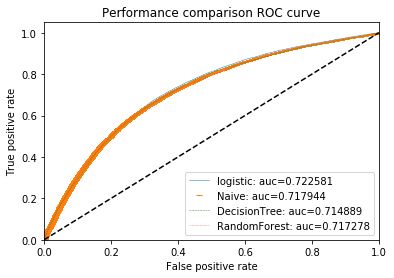

In [81]:
# 데이터프레임의 행을 train/test set으로 나눔
X, Y = df[df.columns[:5]], (df['accident'] == 1)
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .8)
# '_', '-', '--', ':'
for name, (line_fmt, model) in Class_Map.items():
    model.fit(X_train, Y_train)
    #열마다 T, F값 저장
    preds = model.predict_proba(X_test)
    pred = pd.Series(preds[:,1])
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    auc_score = auc(fpr, tpr)
    label = '%s: auc=%f' %(name, auc_score)
    plt.plot(fpr, tpr, line_fmt, linewidth = .5, label = label)

    #K-fold cross validation
    cv = KFold(5, shuffle=True, random_state=0)
    scores = cross_val_score(model, X_train, Y_train, cv=cv)
    print(name)
    print("Score of K-fold Cross Validation :", scores, "Mean: {:.2f}".format(scores.mean()), "\n")


plt.legend(loc="lower right")
plt.title("Performance comparison ROC curve")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
    

In [13]:
# https://scikit-learn.org/stable/modules/tree.html

# RandomForest

In [15]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features =1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(Y_test, Y_pred))


Accuracy :  0.9102181494347421


# Decision Tree

In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib as mpl
import numpy as np

In [18]:
clf = DecisionTreeClassifier(max_depth = 7)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print("Train report \n", classification_report(Y_train, model.predict(X_train)))
print("\nTest report \n", classification_report(Y_test, model.predict(X_test)))
print("\nAccuracy : ", metrics.accuracy_score(Y_test, Y_pred))



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train report 
               precision    recall  f1-score   support

       False       0.91      1.00      0.95     57451
        True       0.00      0.00      0.00      5591

    accuracy                           0.91     63042
   macro avg       0.46      0.50      0.48     63042
weighted avg       0.83      0.91      0.87     63042


Test report 
               precision    recall  f1-score   support

       False       0.91      1.00      0.95    133894
        True       0.00      0.00      0.00     13207

    accuracy                           0.91    147101
   macro avg       0.46      0.50      0.48    147101
weighted avg       0.83      0.91      0.87    147101


Accuracy :  0.9090216925785685


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


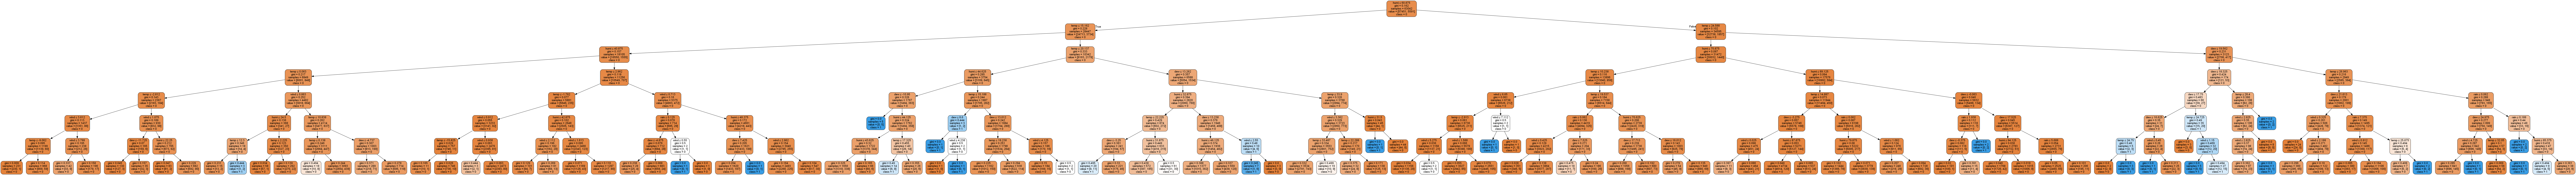

In [19]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True,
                feature_names = features, class_names = accident)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [20]:
clf = DecisionTreeClassifier(max_depth = 6)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy :  0.9097014976104854


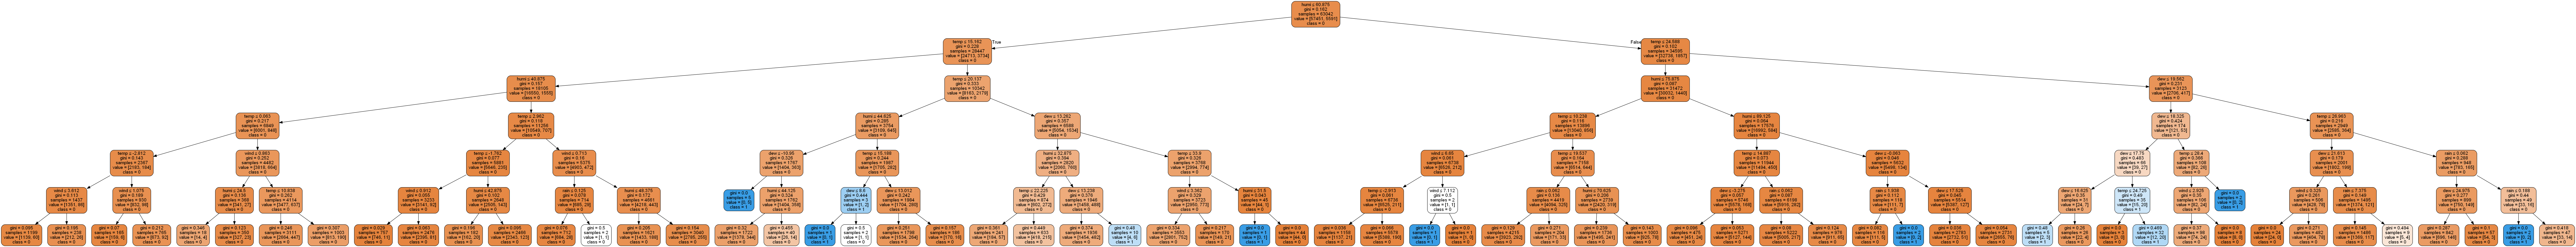

In [21]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True,
                feature_names = features, class_names = accident)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [22]:
confusion_matrix(Y_train, model.predict(X_train))

array([[57451,     0],
       [ 5591,     0]], dtype=int64)

In [23]:
print(classification_report(Y_train, model.predict(X_train)))
print(classification_report(Y_test, model.predict(X_test)))

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       False       0.91      1.00      0.95     57451
        True       0.00      0.00      0.00      5591

    accuracy                           0.91     63042
   macro avg       0.46      0.50      0.48     63042
weighted avg       0.83      0.91      0.87     63042

              precision    recall  f1-score   support

       False       0.91      1.00      0.95    133894
        True       0.00      0.00      0.00     13207

    accuracy                           0.91    147101
   macro avg       0.46      0.50      0.48    147101
weighted avg       0.83      0.91      0.87    147101



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print("Train report \n", classification_report(Y_train, model.predict(X_train)))
print("\nTest report \n", classification_report(Y_test, model.predict(X_test)))
print("\nAccuracy : ", metrics.accuracy_score(Y_test, Y_pred))

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train report 
               precision    recall  f1-score   support

       False       0.91      1.00      0.95     57451
        True       0.00      0.00      0.00      5591

    accuracy                           0.91     63042
   macro avg       0.46      0.50      0.48     63042
weighted avg       0.83      0.91      0.87     63042


Test report 
               precision    recall  f1-score   support

       False       0.91      1.00      0.95    133894
        True       0.00      0.00      0.00     13207

    accuracy                           0.91    147101
   macro avg       0.46      0.50      0.48    147101
weighted avg       0.83      0.91      0.87    147101


Accuracy :  0.9098714488684645


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


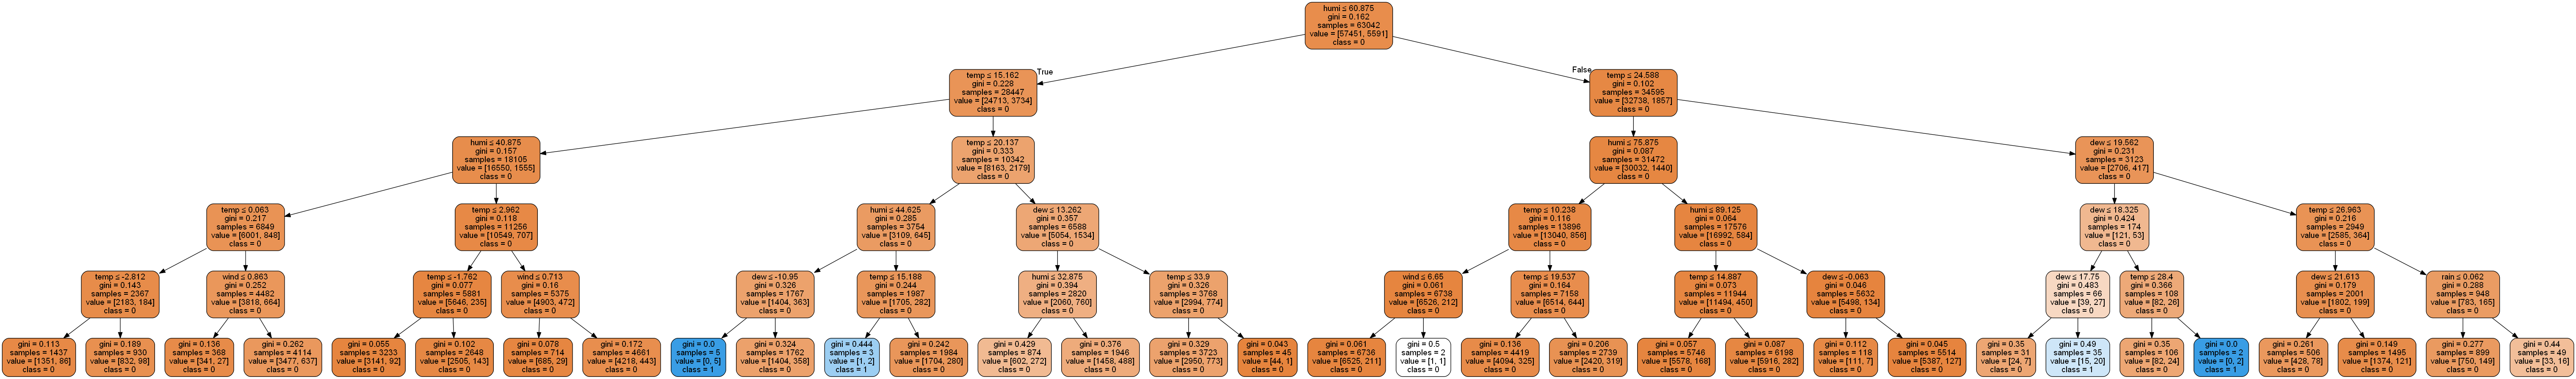

In [25]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True,
                feature_names = features, class_names = accident)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [26]:
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print("Train report \n", classification_report(Y_train, model.predict(X_train)))
print("\nTest report \n", classification_report(Y_test, model.predict(X_test)))
print("\nAccuracy : ", metrics.accuracy_score(Y_test, Y_pred))

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train report 
               precision    recall  f1-score   support

       False       0.91      1.00      0.95     57451
        True       0.00      0.00      0.00      5591

    accuracy                           0.91     63042
   macro avg       0.46      0.50      0.48     63042
weighted avg       0.83      0.91      0.87     63042


Test report 
               precision    recall  f1-score   support

       False       0.91      1.00      0.95    133894
        True       0.00      0.00      0.00     13207

    accuracy                           0.91    147101
   macro avg       0.46      0.50      0.48    147101
weighted avg       0.83      0.91      0.87    147101


Accuracy :  0.9102181494347421


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


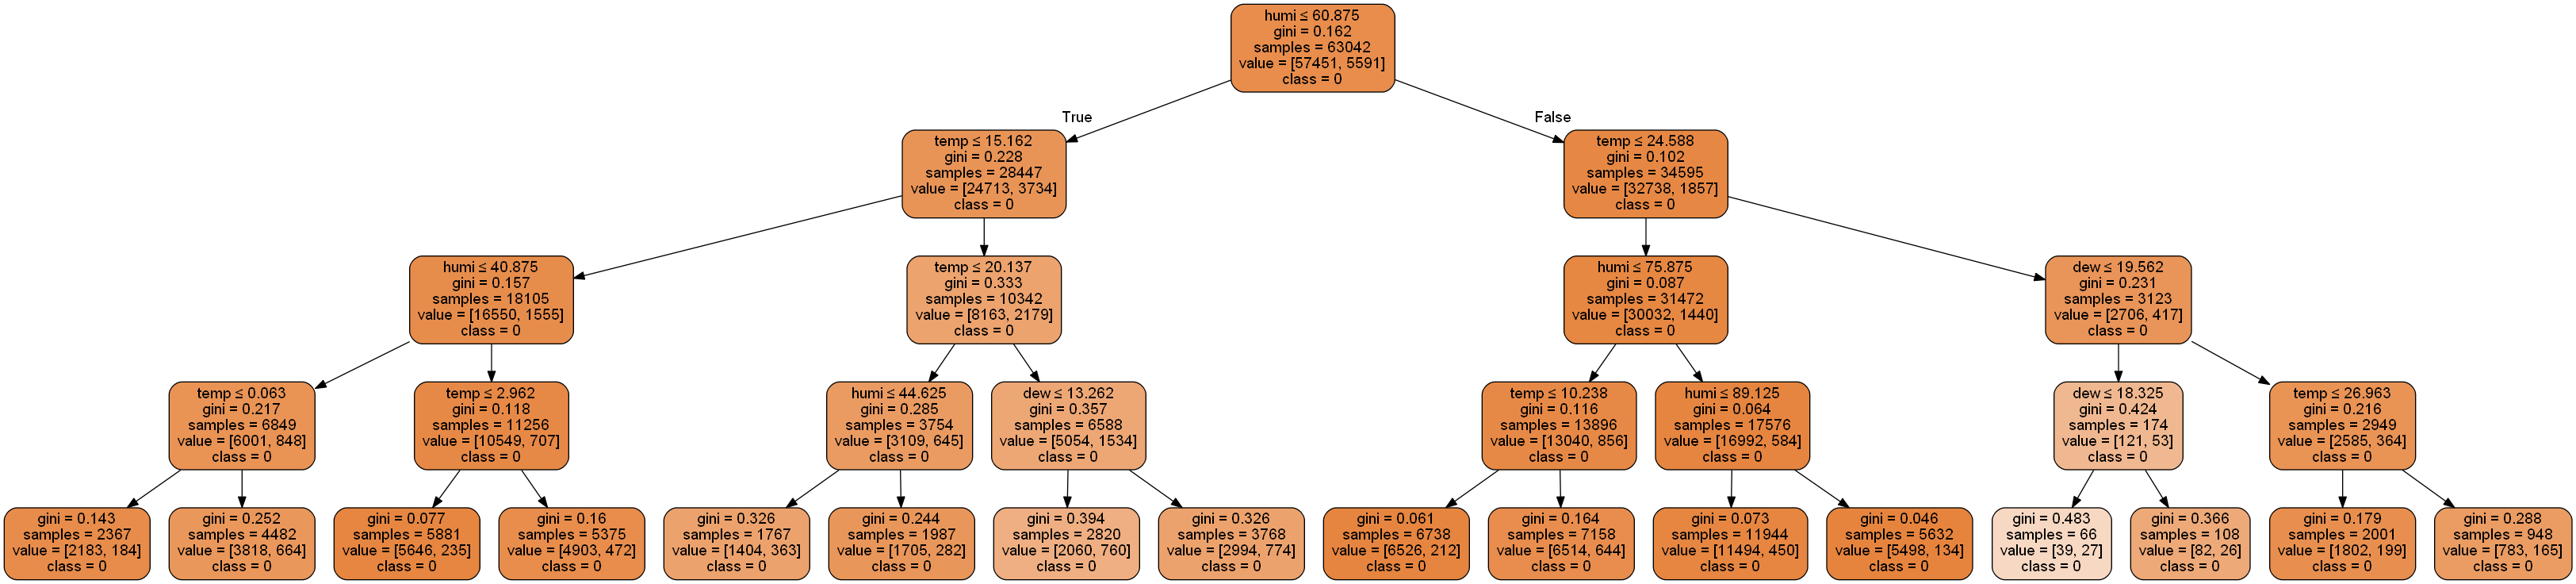

In [27]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True,
                feature_names = features, class_names = accident)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [28]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print("Train report \n", classification_report(Y_train, model.predict(X_train)))
print("\nTest report \n", classification_report(Y_test, model.predict(X_test)))
print("\nAccuracy : ", metrics.accuracy_score(Y_test, Y_pred))

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train report 
               precision    recall  f1-score   support

       False       0.91      1.00      0.95     57451
        True       0.00      0.00      0.00      5591

    accuracy                           0.91     63042
   macro avg       0.46      0.50      0.48     63042
weighted avg       0.83      0.91      0.87     63042


Test report 
               precision    recall  f1-score   support

       False       0.91      1.00      0.95    133894
        True       0.00      0.00      0.00     13207

    accuracy                           0.91    147101
   macro avg       0.46      0.50      0.48    147101
weighted avg       0.83      0.91      0.87    147101


Accuracy :  0.9102181494347421


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


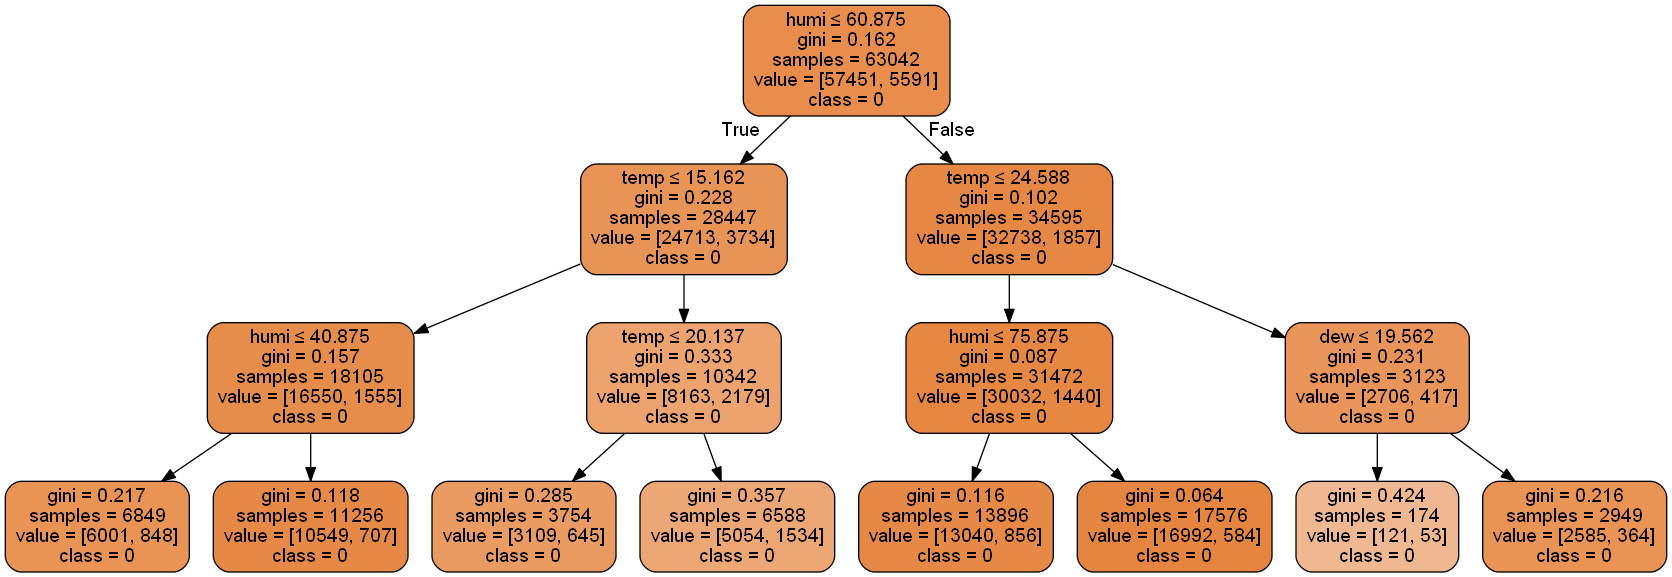

In [29]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True,
                feature_names = features, class_names = accident)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [30]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print("Train report \n", classification_report(Y_train, model.predict(X_train)))
print("\nTest report \n", classification_report(Y_test, model.predict(X_test)))
print("\nAccuracy : ", metrics.accuracy_score(Y_test, Y_pred))

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train report 
               precision    recall  f1-score   support

       False       0.91      1.00      0.95     57451
        True       0.00      0.00      0.00      5591

    accuracy                           0.91     63042
   macro avg       0.46      0.50      0.48     63042
weighted avg       0.83      0.91      0.87     63042


Test report 
               precision    recall  f1-score   support

       False       0.91      1.00      0.95    133894
        True       0.00      0.00      0.00     13207

    accuracy                           0.91    147101
   macro avg       0.46      0.50      0.48    147101
weighted avg       0.83      0.91      0.87    147101


Accuracy :  0.9102181494347421


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


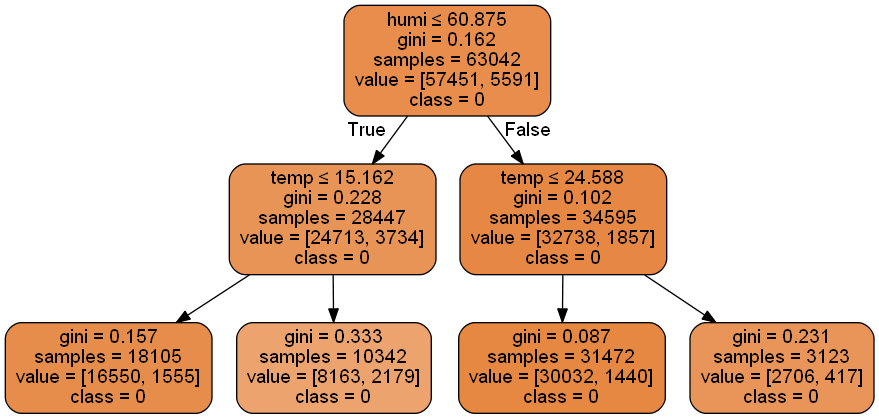

In [31]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True,
                feature_names = features, class_names = accident)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())